# Loan Status Prediction

### Importing all dependencies

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [12]:
data=pd.read_csv('loan_data.csv')

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.shape

(614, 13)

In [18]:
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### Data Collection and Data Processing

In [21]:
nan_counts = data.isna().sum()
print(nan_counts)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#### Data Imputation

In [24]:
#Categorical Variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)


/var/folders/15/hl4xwqj536z0klqh2nc929_00000gn/T/ipykernel_33277/3832110060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
/var/folders/15/hl4xwqj536z0klqh2nc929_00000gn/T/ipykernel_33277/3832110060.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [26]:
#Numerical Variables
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

/var/folders/15/hl4xwqj536z0klqh2nc929_00000gn/T/ipykernel_33277/3563720973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)


In [28]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [30]:
data['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [32]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [34]:
data['Dependents'].value_counts()


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [36]:
data['Gender'].value_counts()


Gender
Male      502
Female    112
Name: count, dtype: int64

In [38]:
data['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [40]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Data Visualization

In [43]:
import matplotlib.pyplot as plt

In [45]:
sns.set_palette("tab10")

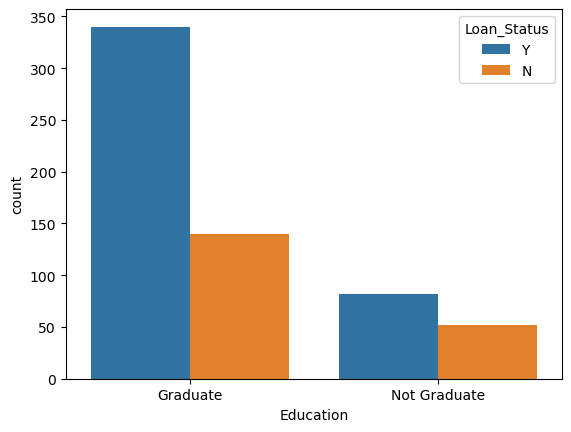

In [49]:
# education and load status
sns.countplot(x = 'Education', hue = "Loan_Status", data = data)
plt.show()

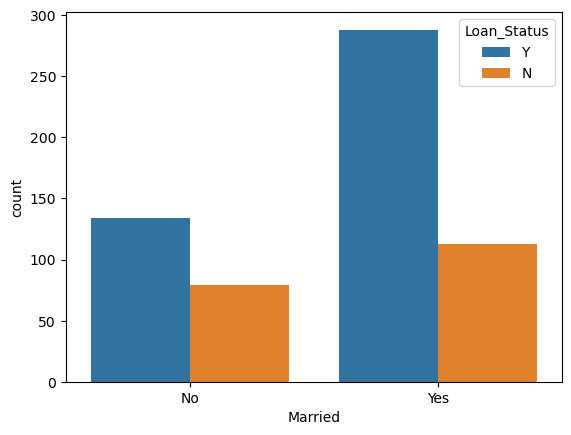

In [51]:
# Married and load status
sns.countplot(x = 'Married', hue = "Loan_Status", data = data)
plt.show()

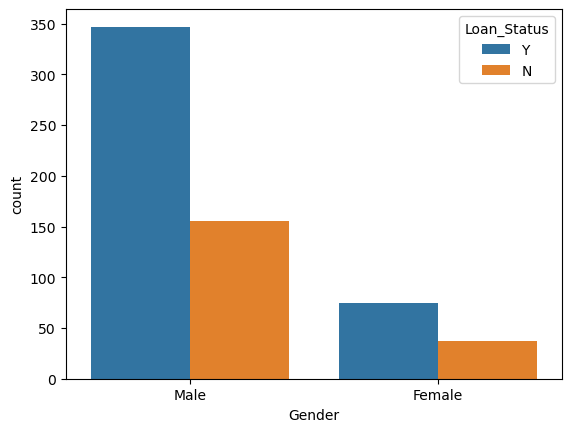

In [53]:
# Gender and load status
sns.countplot(x = 'Gender', hue = "Loan_Status", data = data)
plt.show()

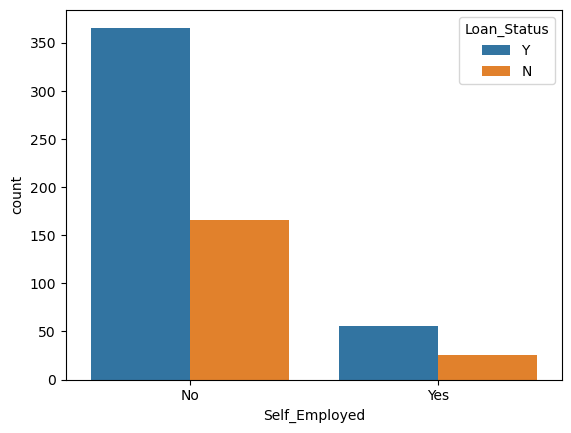

In [55]:
# Self_Employed and load status
sns.countplot(x = 'Self_Employed', hue = "Loan_Status", data = data)
plt.show()

In [57]:
label_encoder = LabelEncoder()
data['Loan_ID'] = label_encoder.fit_transform(data['Loan_ID'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [59]:
replacements = {
    'Property_Area': {'Semiurban': 0, 'Urban': 1, 'Rural': 2},
    'Married': {'Yes':0, 'No':1},
    'Gender' : {'Male':0, 'Female':1},
    'Dependents' : {'0':1, '1':1, '2':2, '3+':3},
    'Education': {'Graduate':0,'Not Graduate':2},
    'Self_Employed':{'No':0,'Yes':1},
    'Loan_Status': {'Y':0, 'N':1}
    
}
data.replace(replacements, inplace=True)

/var/folders/15/hl4xwqj536z0klqh2nc929_00000gn/T/ipykernel_33277/3471240837.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(replacements, inplace=True)


In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,1,0,0,5849,0.0,146.412162,360.0,1.0,1,0
1,1,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,1
2,2,0,0,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0
3,3,0,0,1,2,0,2583,2358.0,120.000000,360.0,1.0,1,0
4,4,0,1,1,0,0,6000,0.0,141.000000,360.0,1.0,1,0


In [63]:
print(data.dtypes)

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


In [65]:
X=data.drop(columns=["Loan_Status"],axis=1).values
Y=data['Loan_Status'].values

### Data Standardization

In [68]:
scalar=StandardScaler()

In [70]:
scalar.fit(X)

StandardScaler()

In [72]:
Standard_data=scalar.transform(X)

In [74]:
print(Standard_data)

[[-1.72923217 -0.47234264  1.37208932 ...  0.2732313   0.41173269
   0.10798877]
 [-1.7235903  -0.47234264 -0.72881553 ...  0.2732313   0.41173269
   1.33586108]
 [-1.71794844 -0.47234264 -0.72881553 ...  0.2732313   0.41173269
   0.10798877]
 ...
 [ 1.71794844 -0.47234264 -0.72881553 ...  0.2732313   0.41173269
   0.10798877]
 [ 1.7235903  -0.47234264 -0.72881553 ...  0.2732313   0.41173269
   0.10798877]
 [ 1.72923217  2.11710719  1.37208932 ...  0.2732313  -2.42876026
  -1.11988354]]


### Training and Test data

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(Standard_data,Y,test_size=0.2,stratify=Y,random_state=2)

### Model evaluation

In [80]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [82]:
#accuracy on training data
X_train_predict=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict,Y_train)
print(training_data_accuracy)

0.7983706720977597


In [84]:
#accuracy on testing data
X_test_predict=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_predict,Y_test)
print(testing_data_accuracy)

0.8536585365853658
